In [18]:
import os.path

import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=["SimHei"]
plt.figure(figsize=(14, 12))
data1 = pd.read_csv("BiotechCropsAllTables2022.csv")
data1['Value'] = data1["Value"].apply(lambda x: 0 if x =="*" or x=="." else int(x))

<Figure size 1400x1200 with 0 Axes>

In [19]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.08, 1.03*height, '%s' % int(height), size=10, family="Times new roman")

dict1 = {}
dict2 = {}

year1 = sorted(data1.Year.unique())

if not os.path.exists("State Analysis"):
    os.makedirs("State Analysis")
if not os.path.exists("Attribute Analysis"):
    os.makedirs("Attribute Analysis")

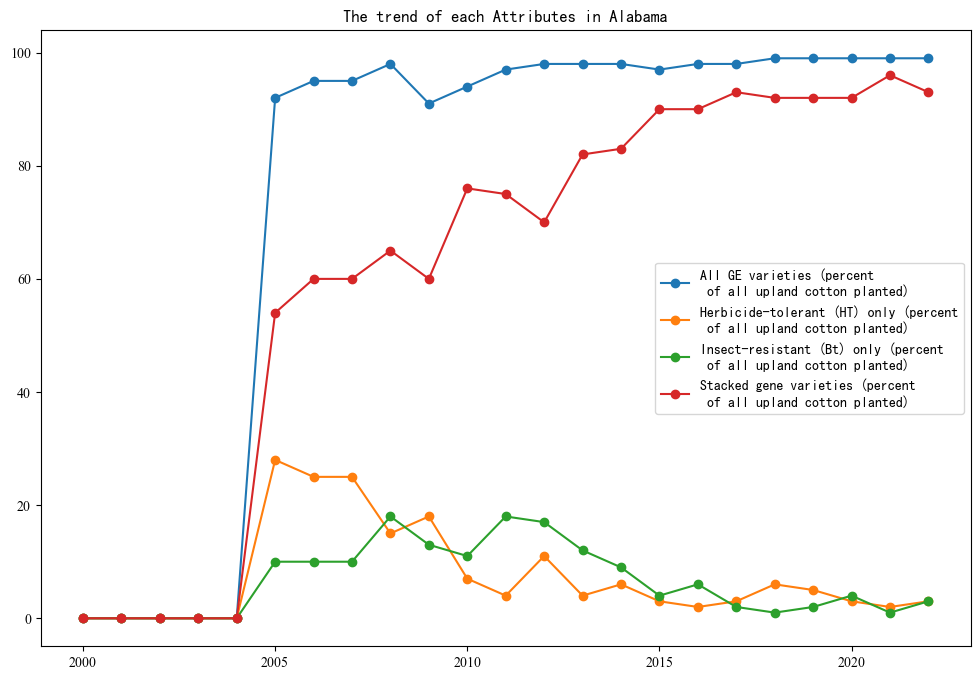

<Figure size 640x480 with 0 Axes>

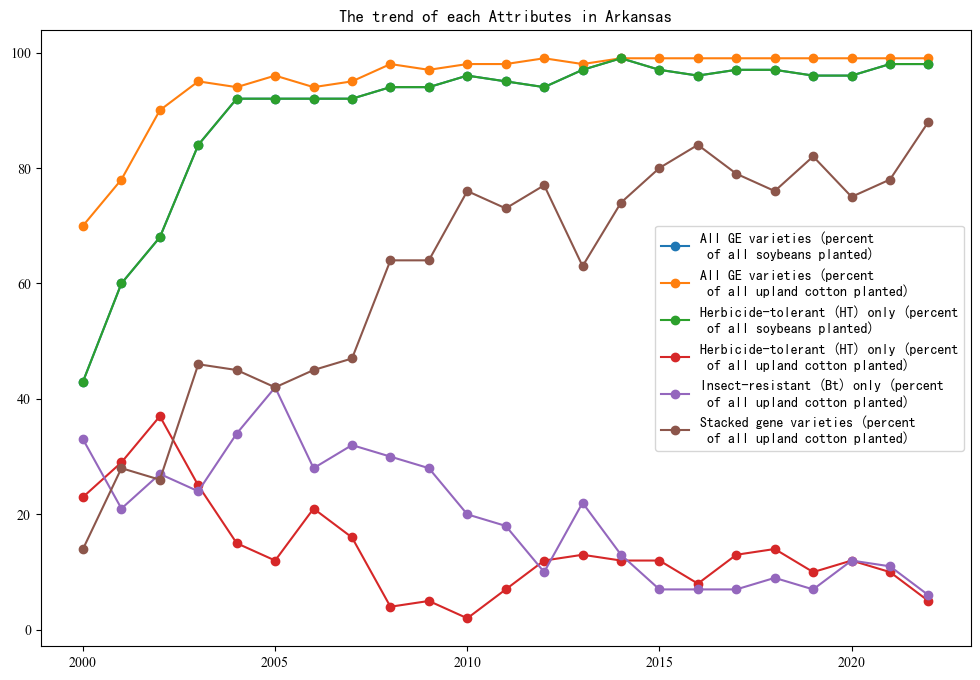

<Figure size 640x480 with 0 Axes>

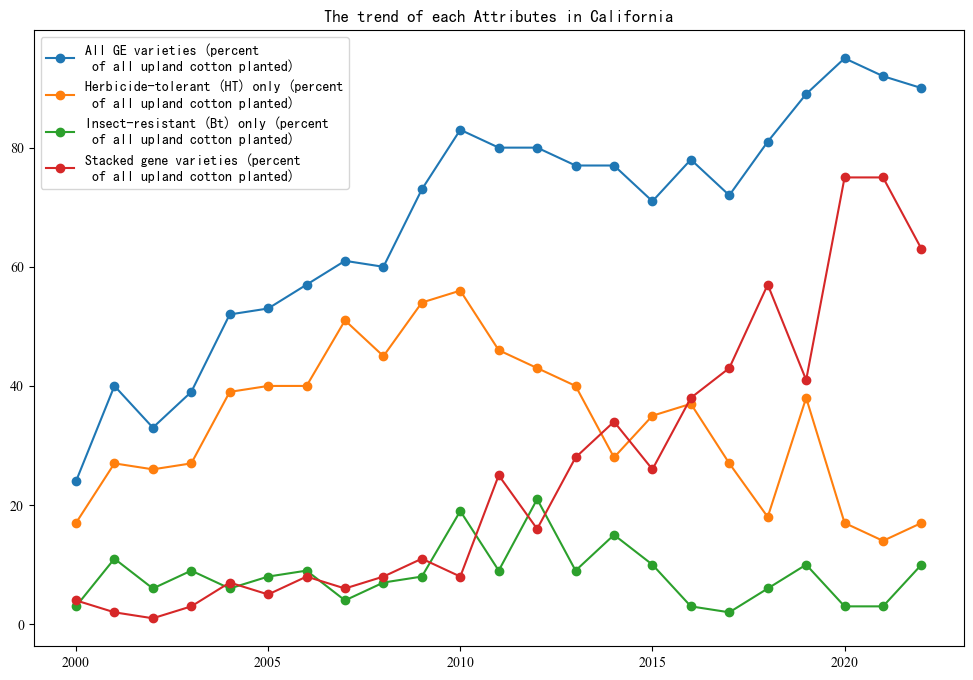

<Figure size 640x480 with 0 Axes>

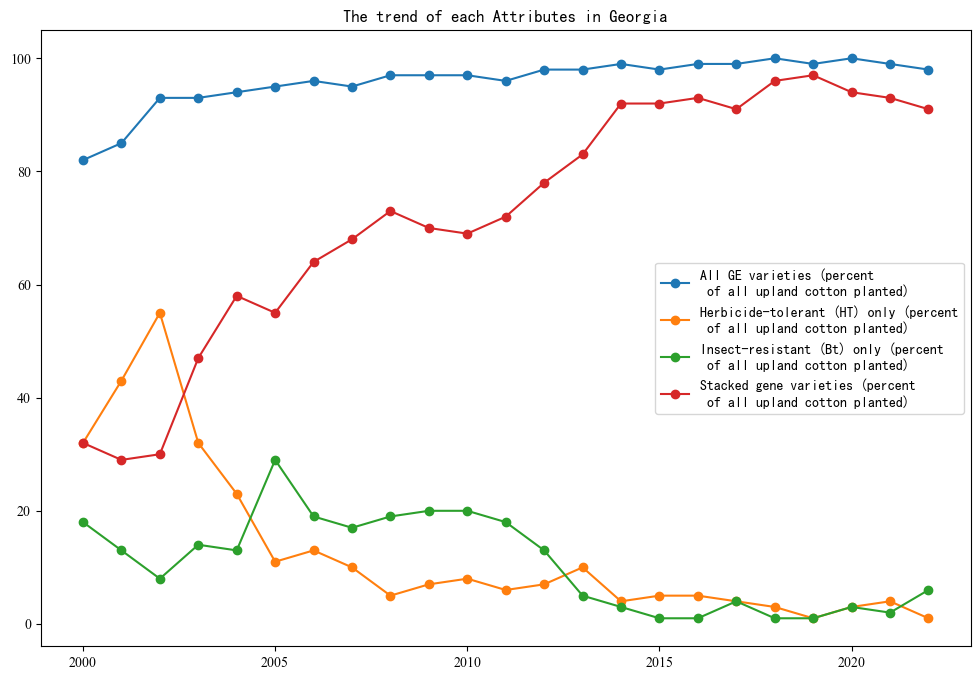

<Figure size 640x480 with 0 Axes>

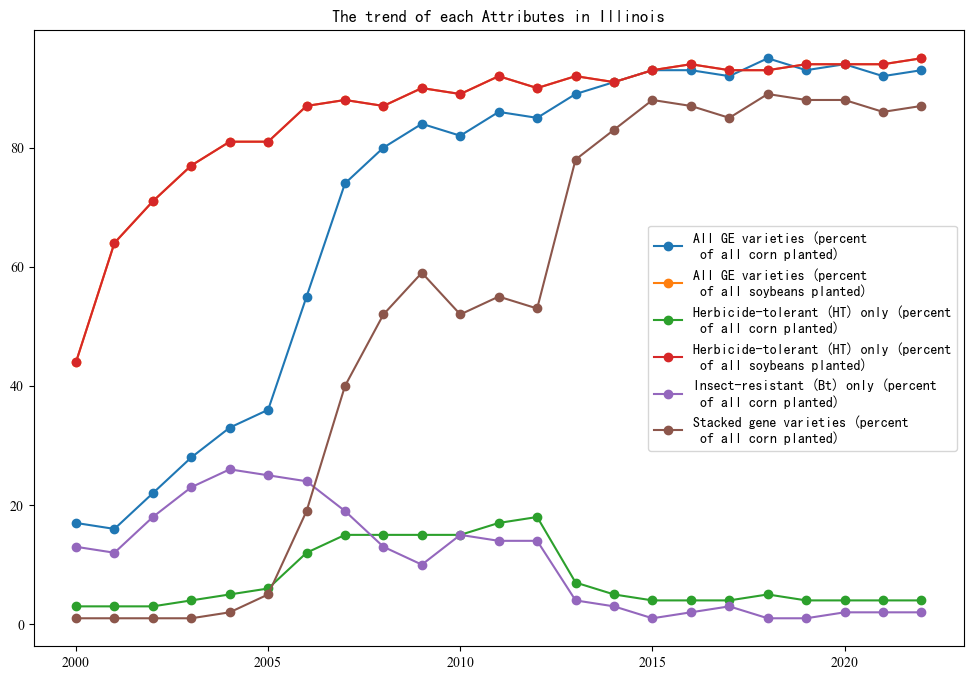

<Figure size 640x480 with 0 Axes>

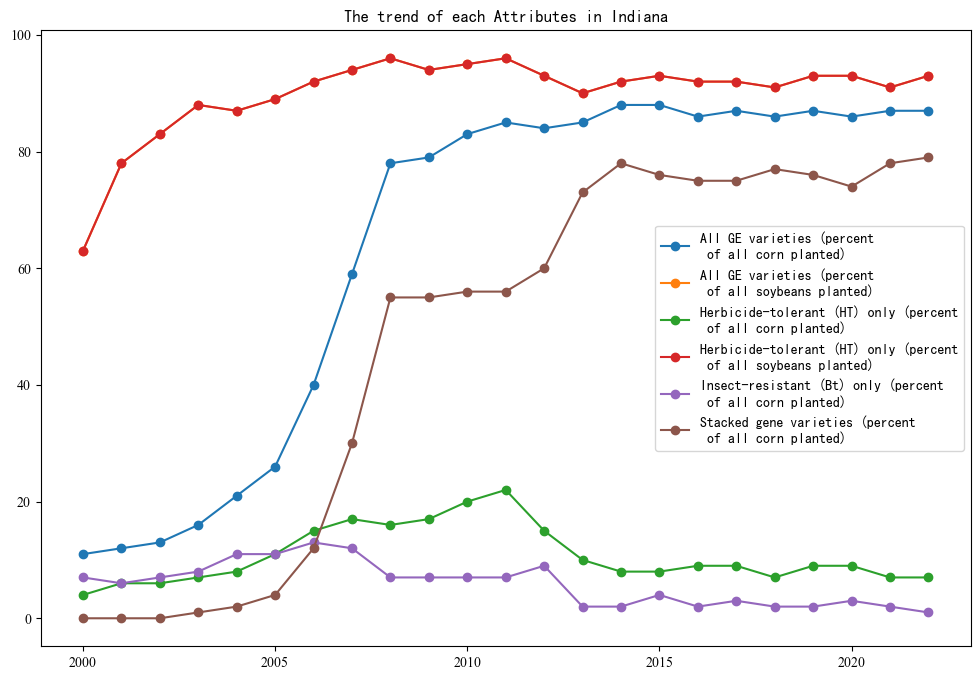

<Figure size 640x480 with 0 Axes>

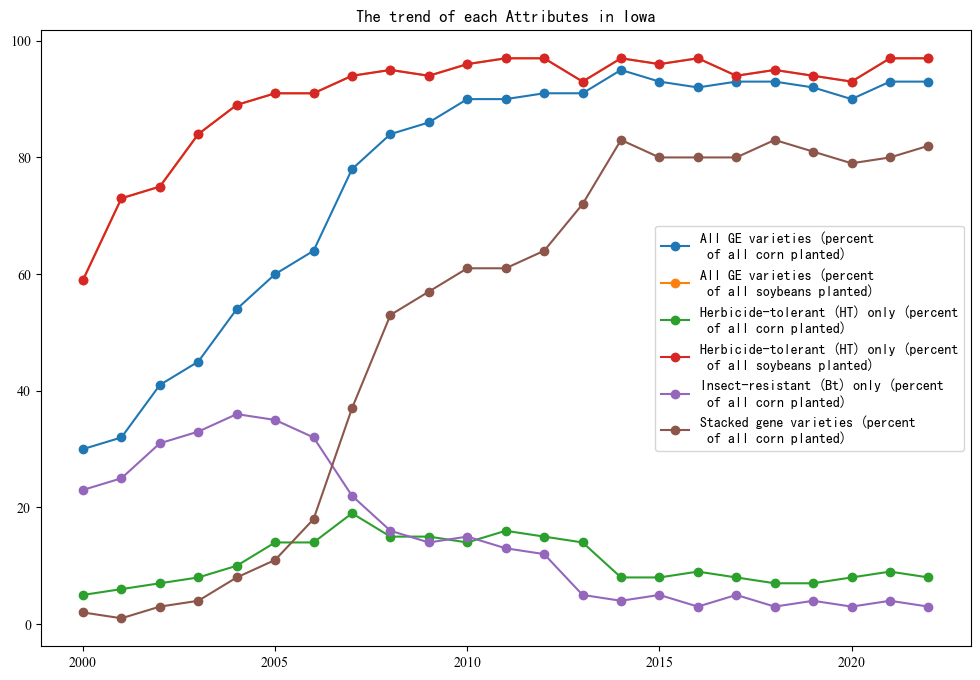

<Figure size 640x480 with 0 Axes>

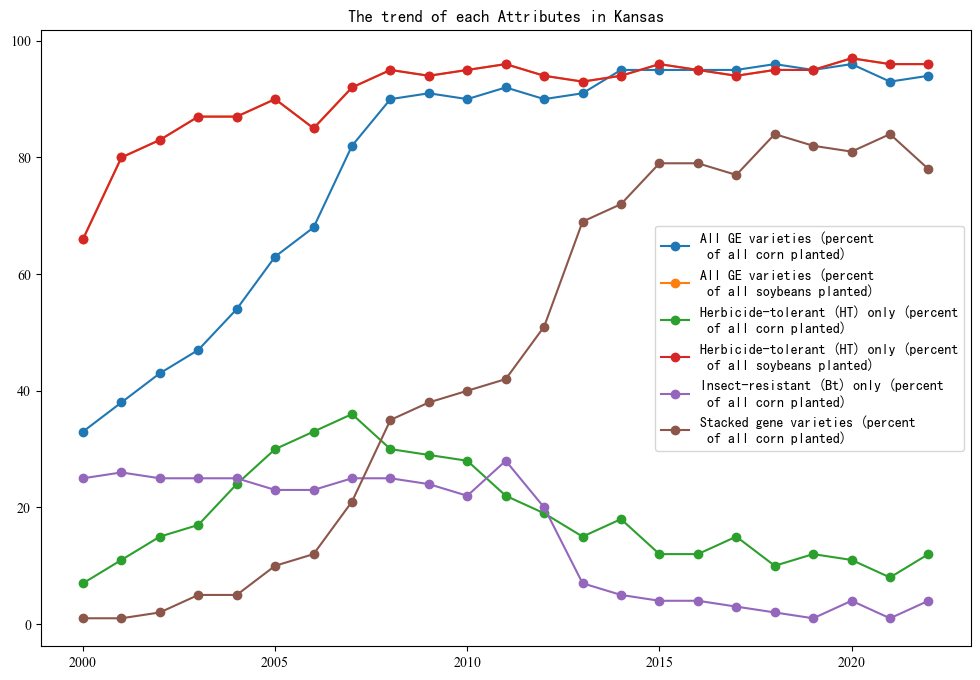

<Figure size 640x480 with 0 Axes>

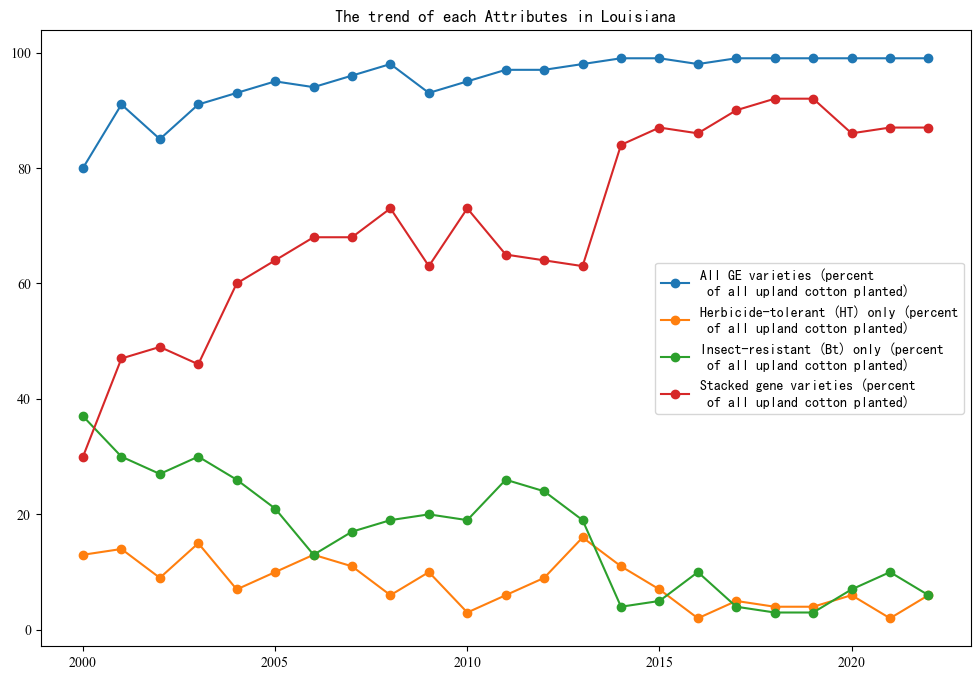

<Figure size 640x480 with 0 Axes>

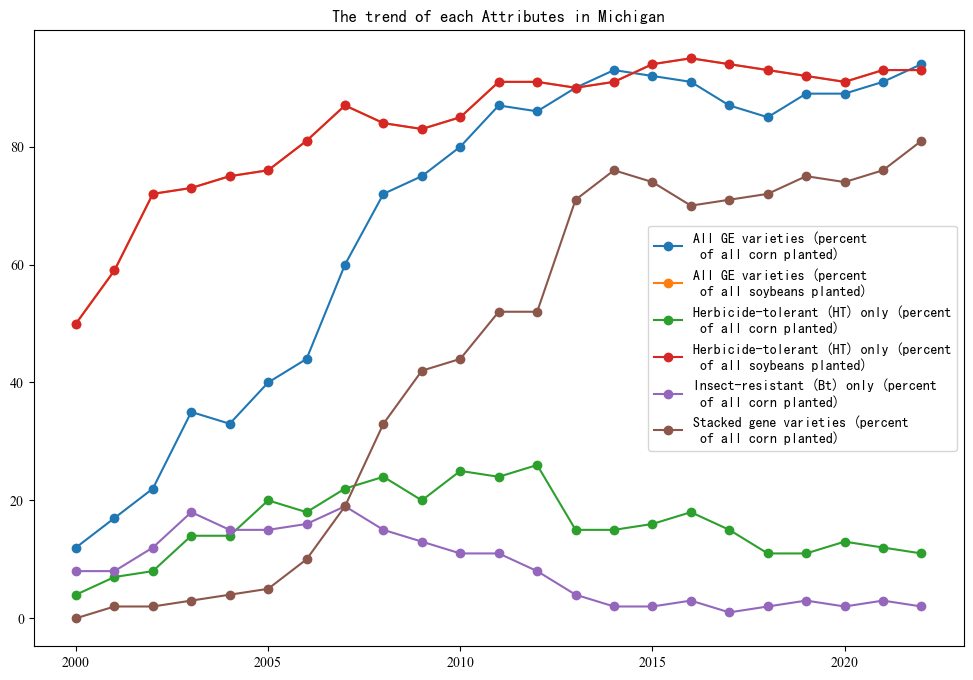

<Figure size 640x480 with 0 Axes>

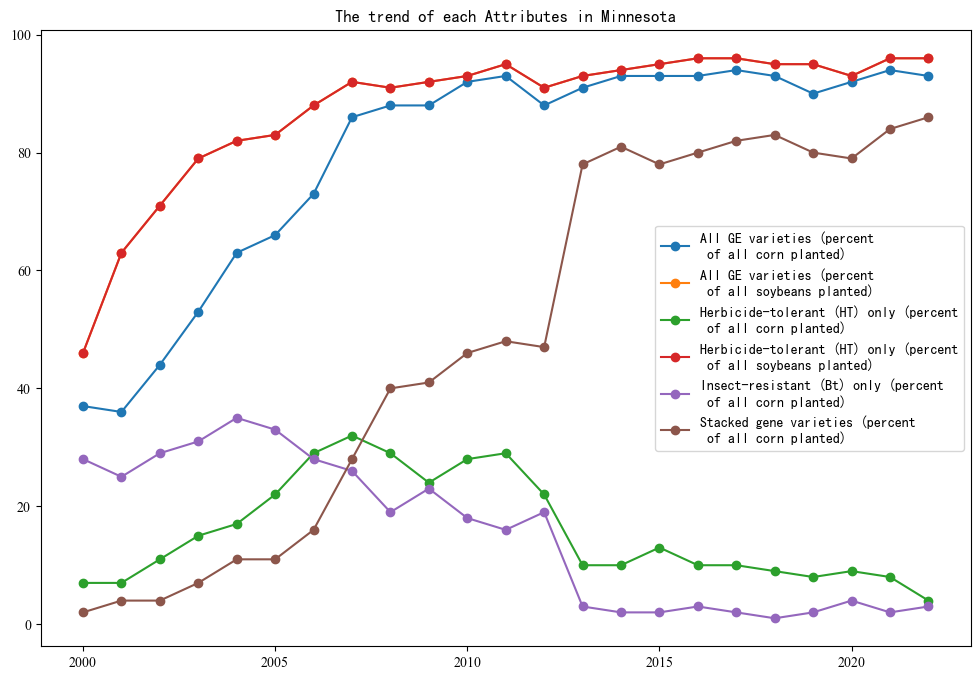

<Figure size 640x480 with 0 Axes>

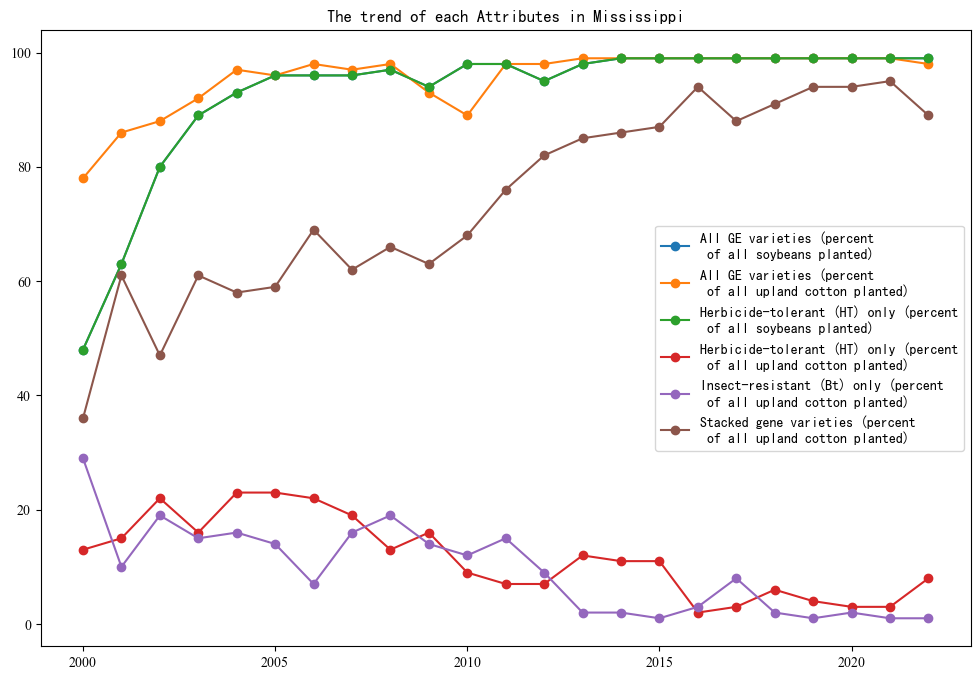

<Figure size 640x480 with 0 Axes>

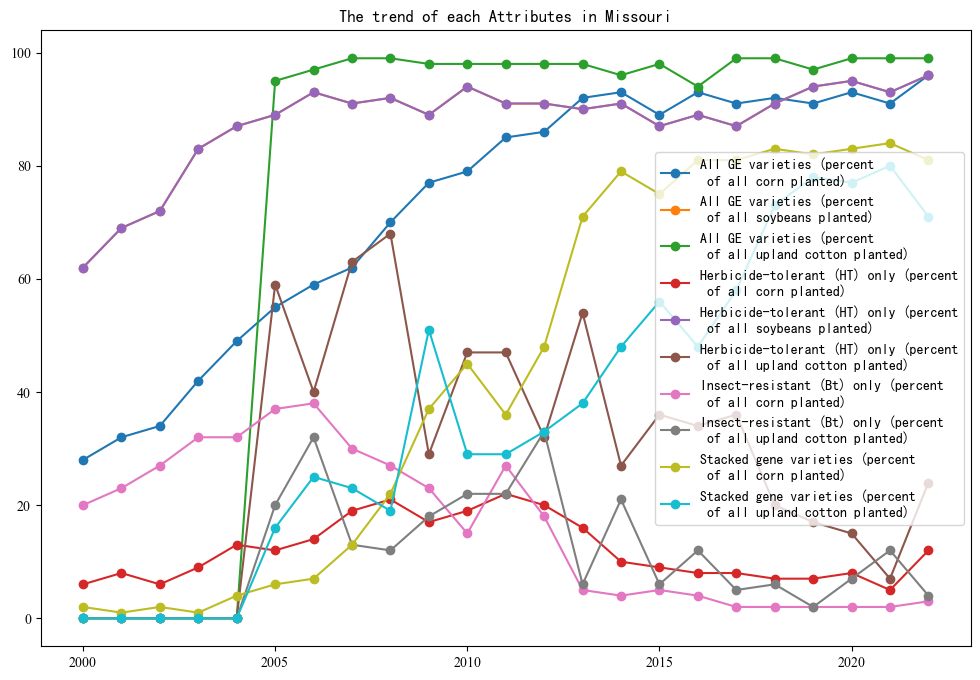

<Figure size 640x480 with 0 Axes>

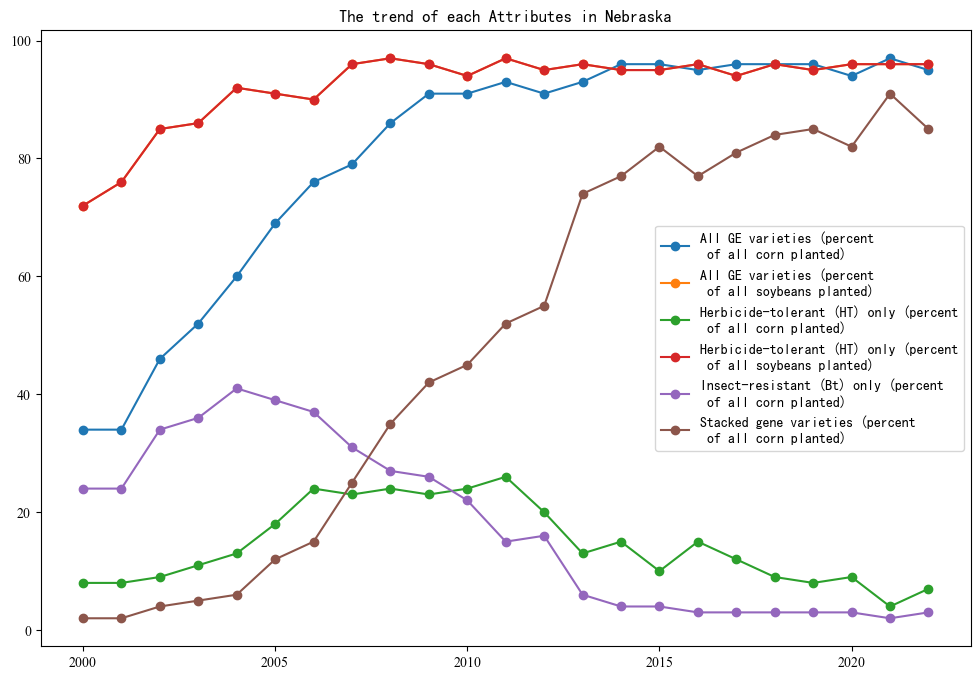

<Figure size 640x480 with 0 Axes>

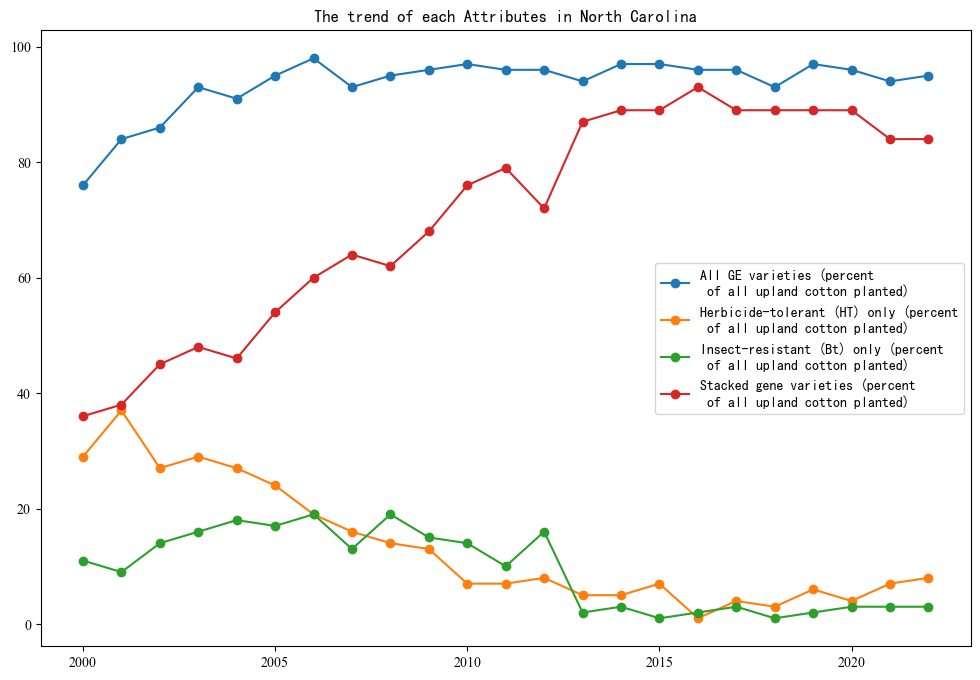

<Figure size 640x480 with 0 Axes>

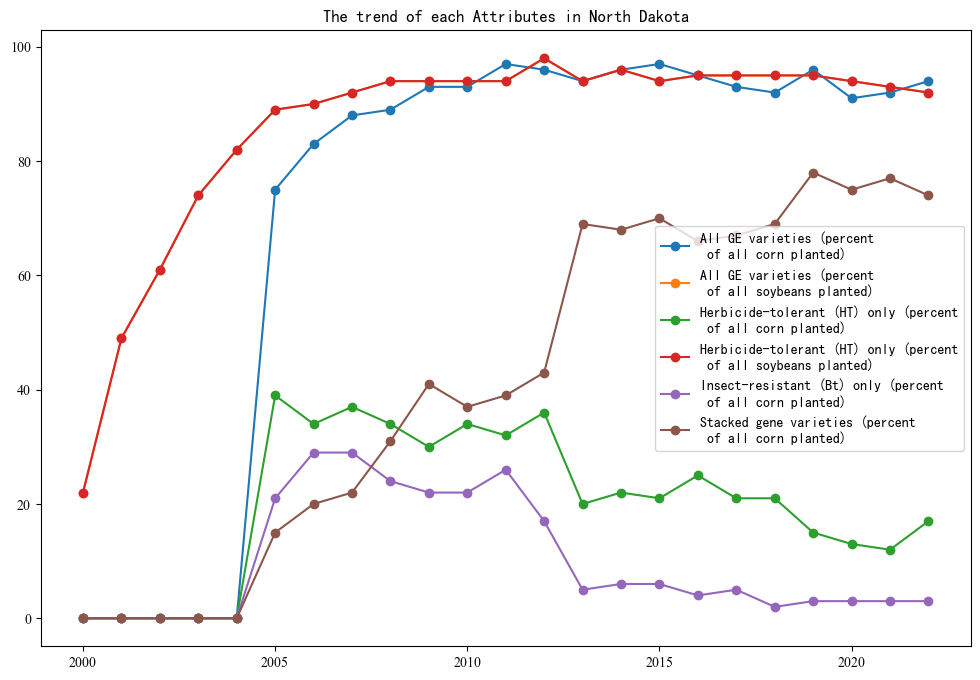

<Figure size 640x480 with 0 Axes>

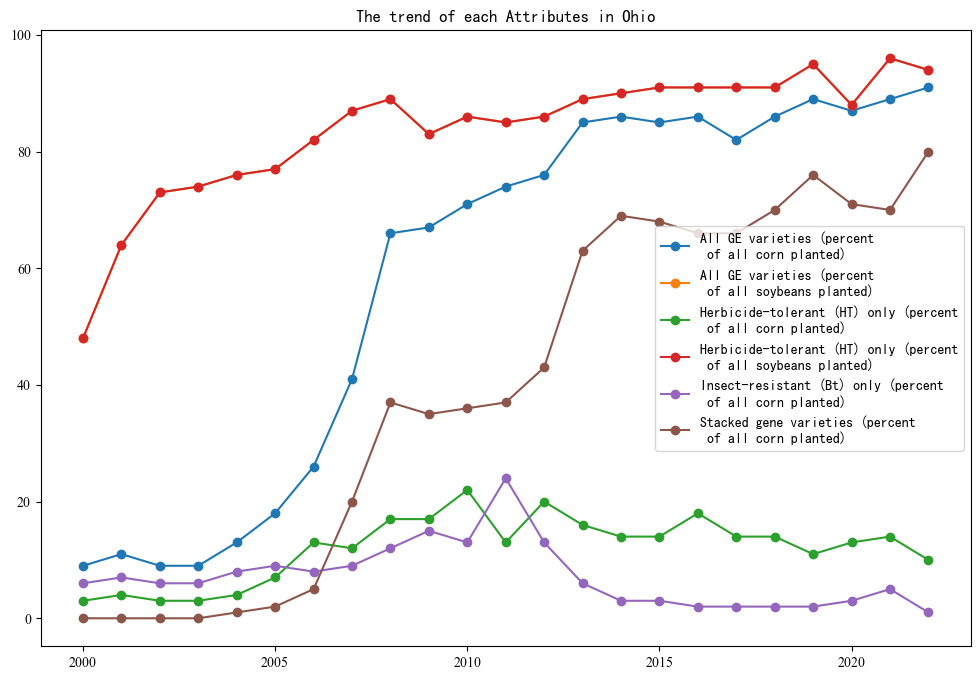

<Figure size 640x480 with 0 Axes>

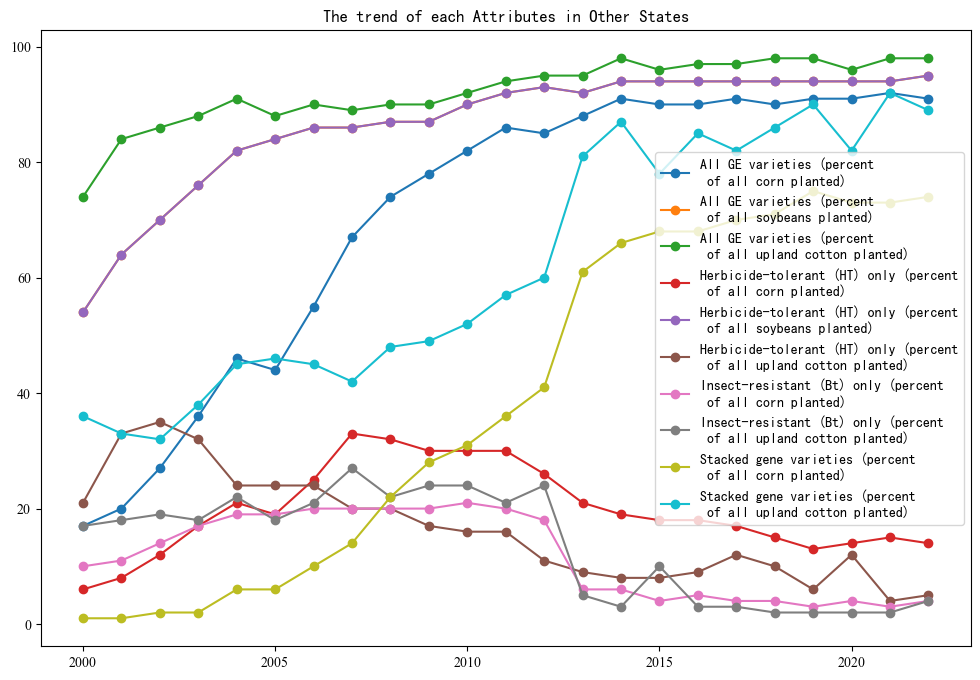

<Figure size 640x480 with 0 Axes>

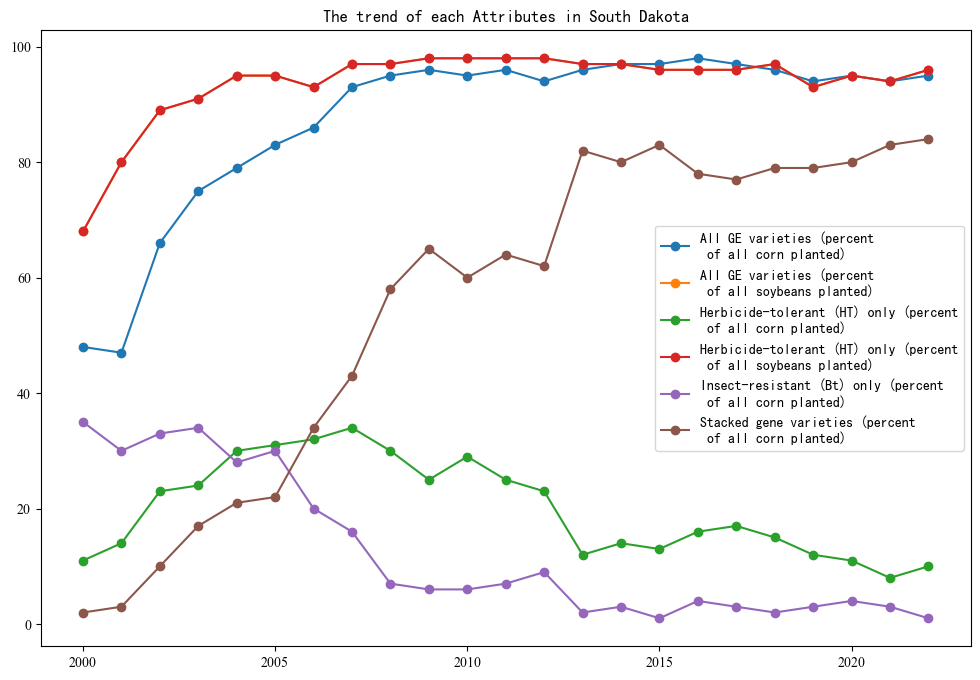

<Figure size 640x480 with 0 Axes>

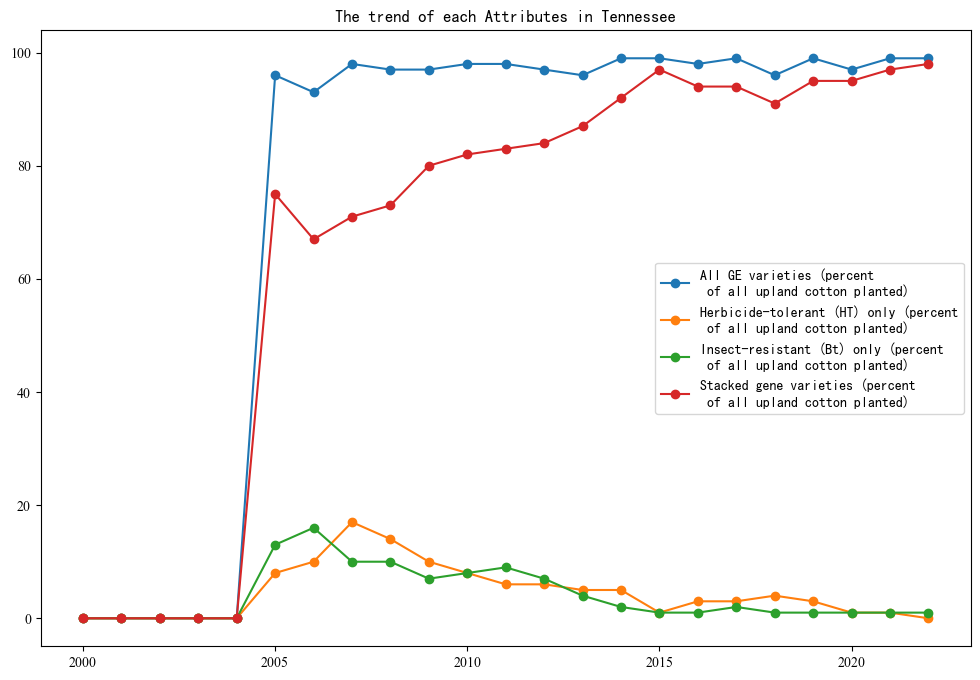

<Figure size 640x480 with 0 Axes>

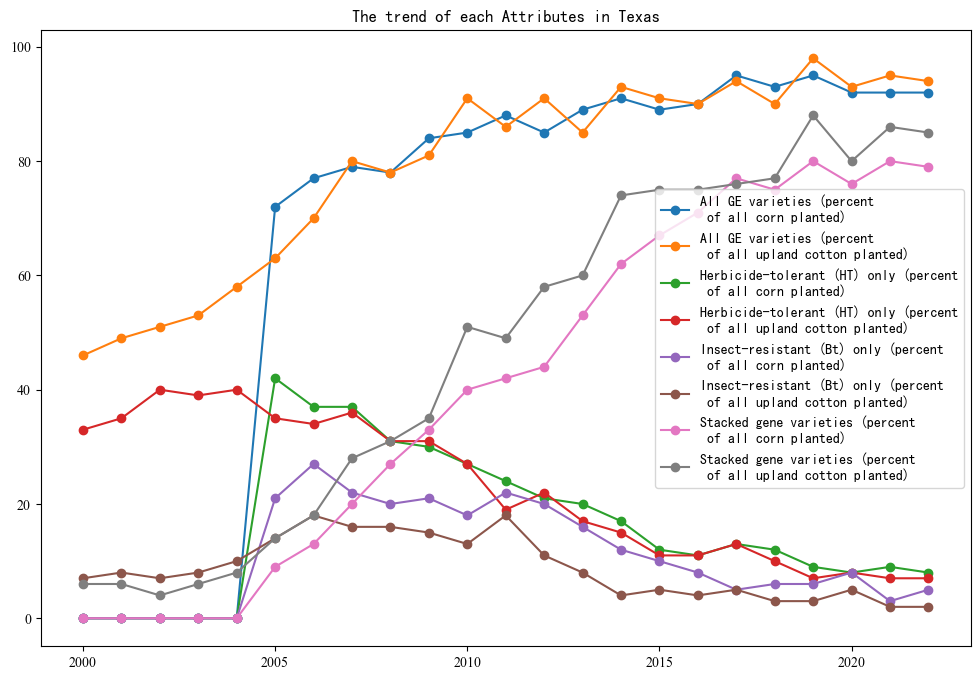

<Figure size 640x480 with 0 Axes>

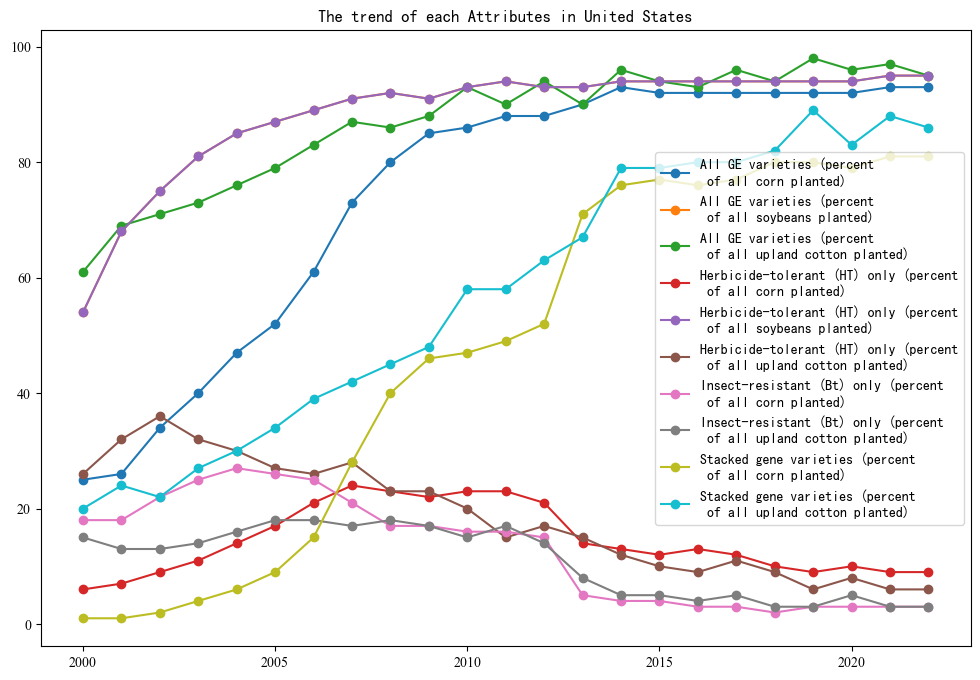

<Figure size 640x480 with 0 Axes>

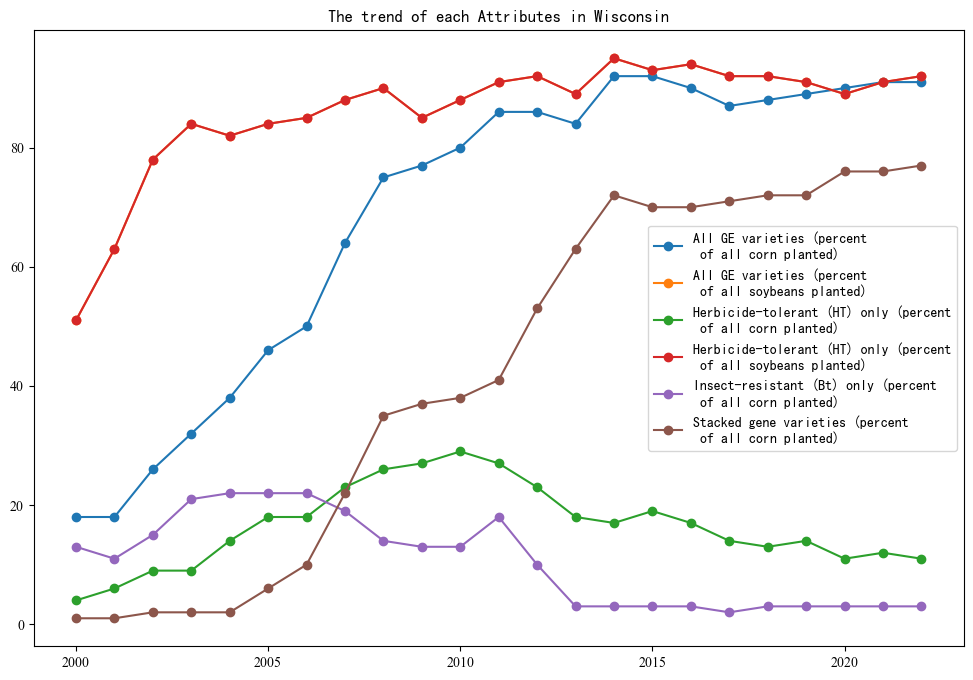

<Figure size 640x480 with 0 Axes>

In [20]:
#Analysis by states
for state in sorted(data1.State.unique()):
    data2 = data1[data1["State"] == state]
    mean1 = data2.Value.mean()
    dict1[state] = mean1

    plt.figure(figsize=(12, 8))
    for attribute in data2.Attribute.unique():
        year_dict1 = {i: 0 for i in year1}
        data3 = data2[data2["Attribute"]==attribute]
        for m in range(data3.shape[0]):
            year_dict1[list(data3["Year"])[m]] = list(data3["Value"])[m]
        plt.plot(year1, year_dict1.values(), marker='o', label=attribute.replace('percent','percent\n'))
    plt.xticks(fontproperties='Times New Roman', fontsize=10)
    plt.yticks(fontproperties='Times New Roman', fontsize=10)
    plt.title(f'The trend of each Attributes in {state}')
    plt.legend()
    plt.show()
    plt.savefig(f'State Analysis/{state}.jpg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


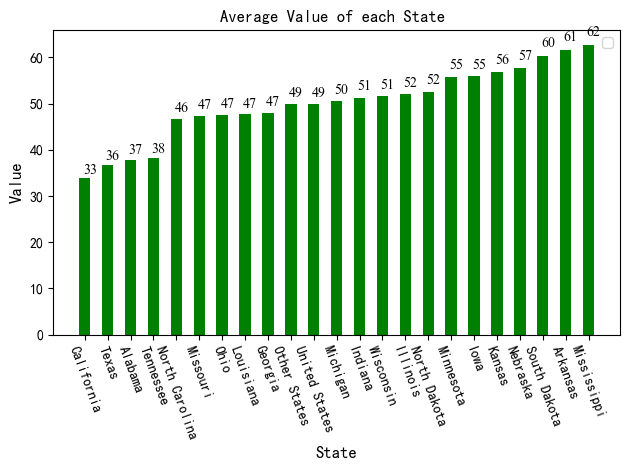

<Figure size 640x480 with 0 Axes>

In [21]:
dict1 = {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1])}
cm1 = plt.bar([i for i in dict1.keys()],[i for i in dict1.values()],width=0.5,color="g")
autolabel(cm1)
plt.xlabel("State", size=12)
plt.ylabel("Value", size=12)
plt.xticks(rotation=-70)
plt.title("Average Value of each State ")
plt.tight_layout()
plt.legend()
plt.show()
plt.savefig(f'State Analysis/State Value trend.jpg')

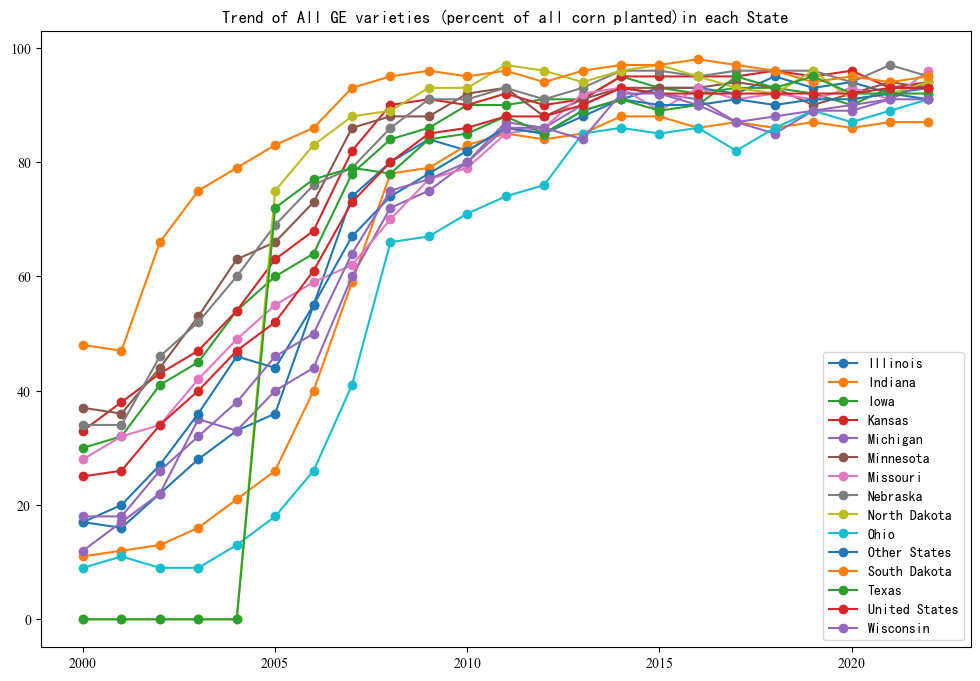

<Figure size 640x480 with 0 Axes>

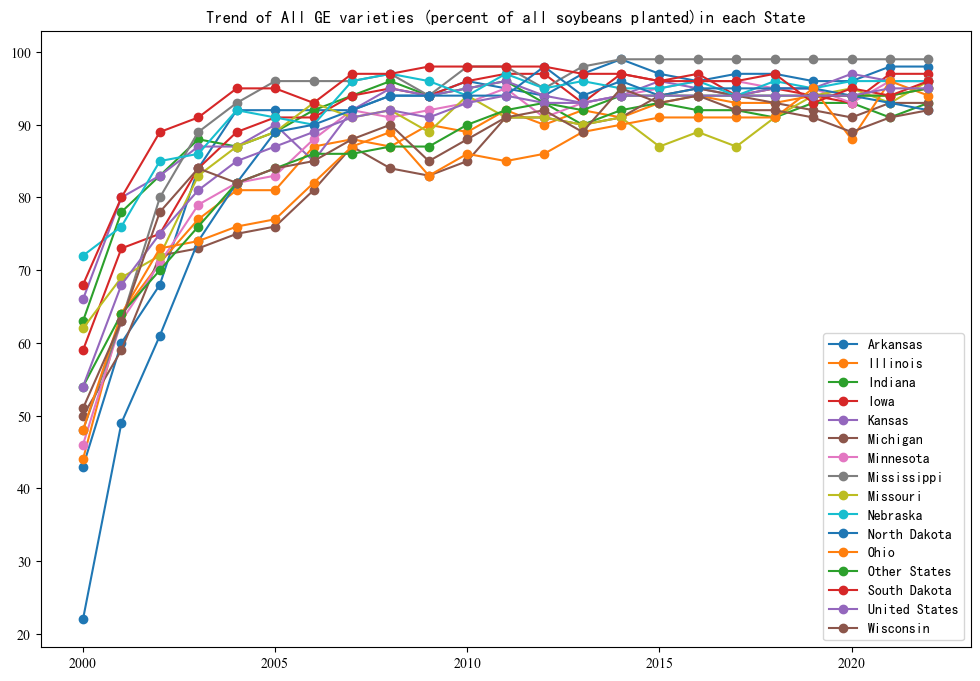

<Figure size 640x480 with 0 Axes>

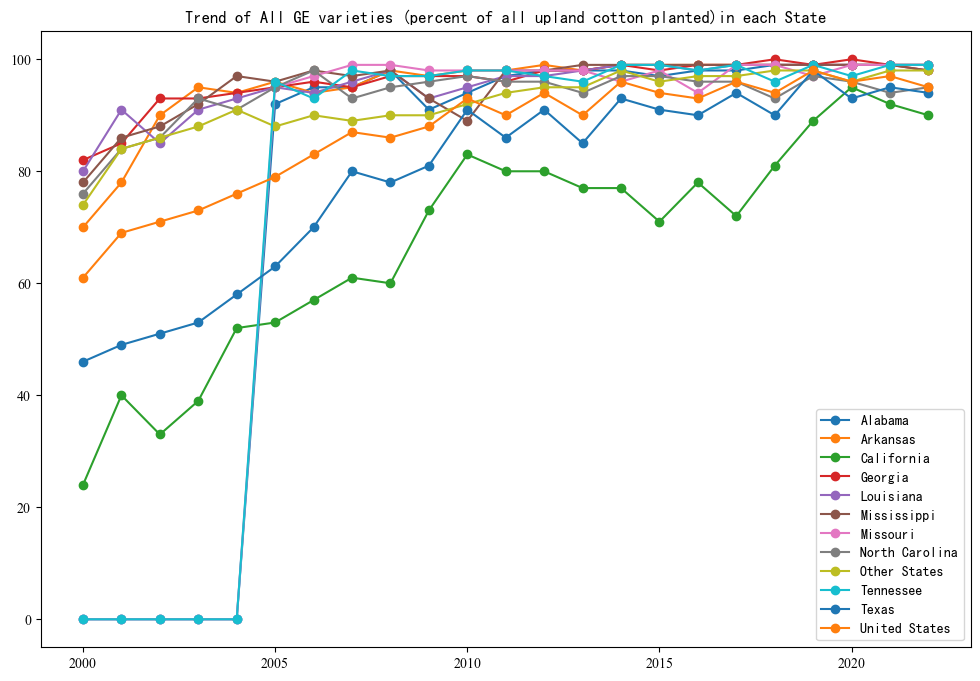

<Figure size 640x480 with 0 Axes>

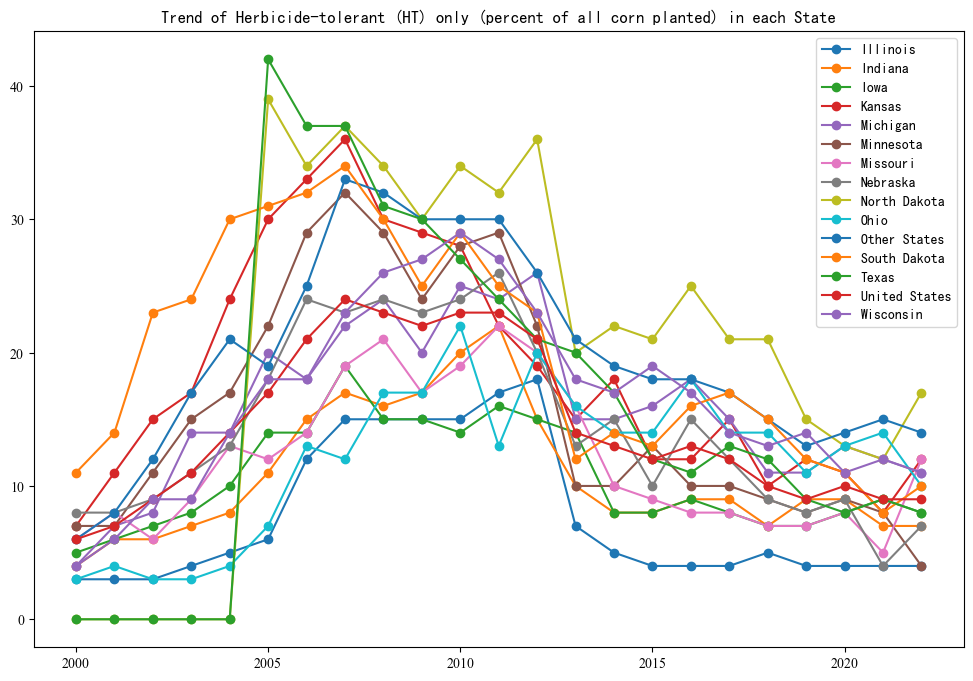

<Figure size 640x480 with 0 Axes>

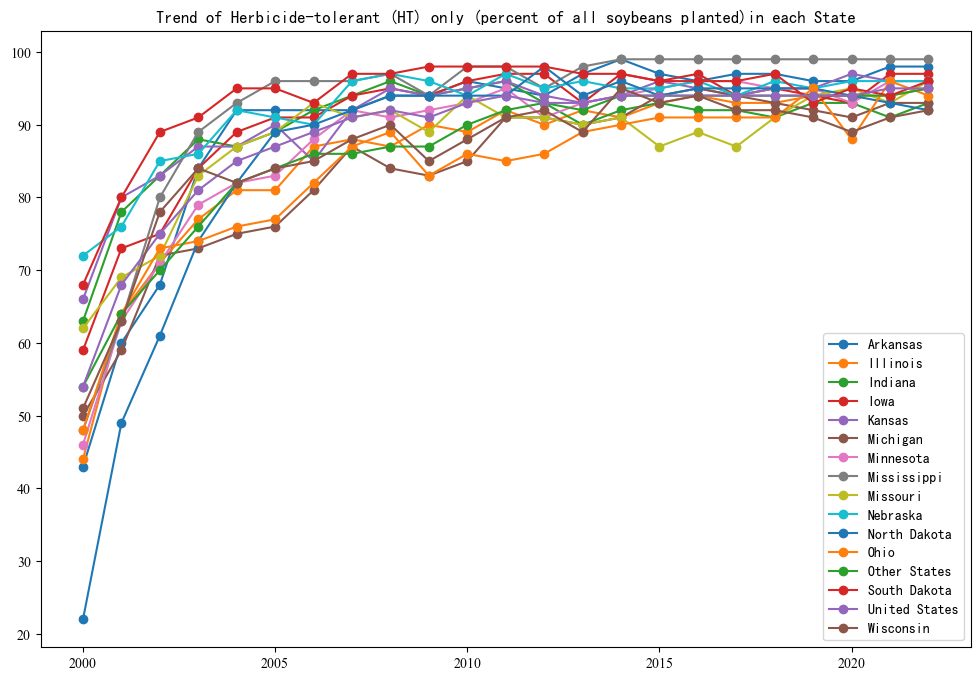

<Figure size 640x480 with 0 Axes>

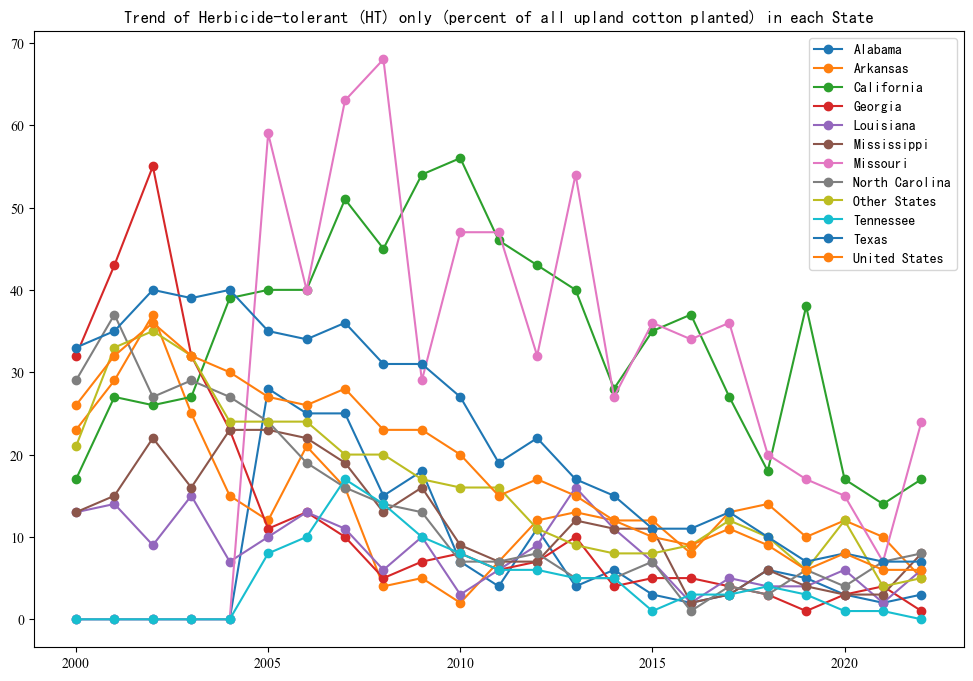

<Figure size 640x480 with 0 Axes>

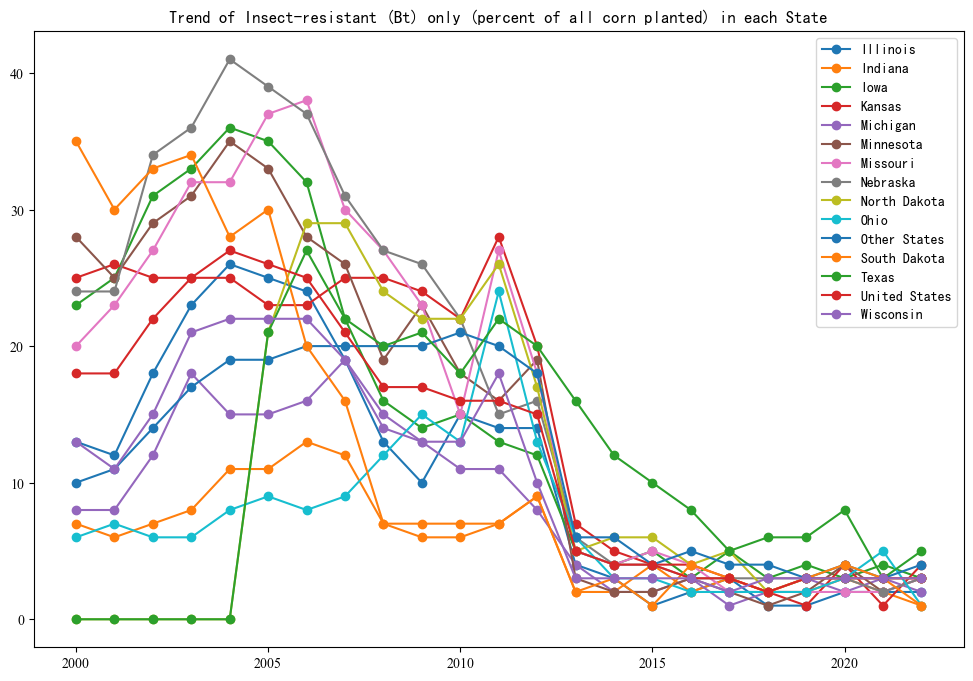

<Figure size 640x480 with 0 Axes>

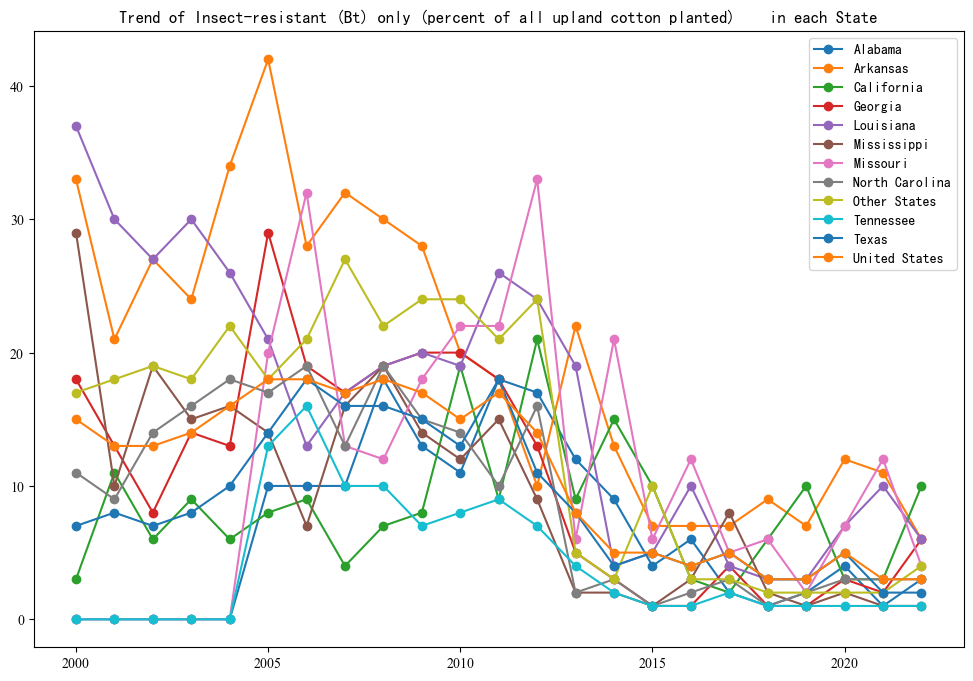

<Figure size 640x480 with 0 Axes>

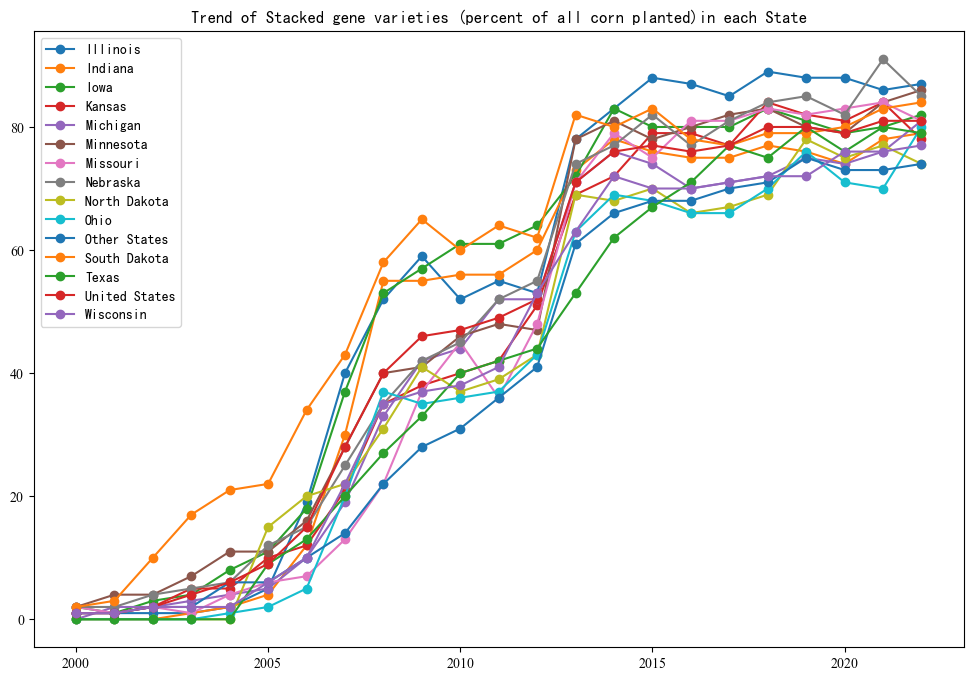

<Figure size 640x480 with 0 Axes>

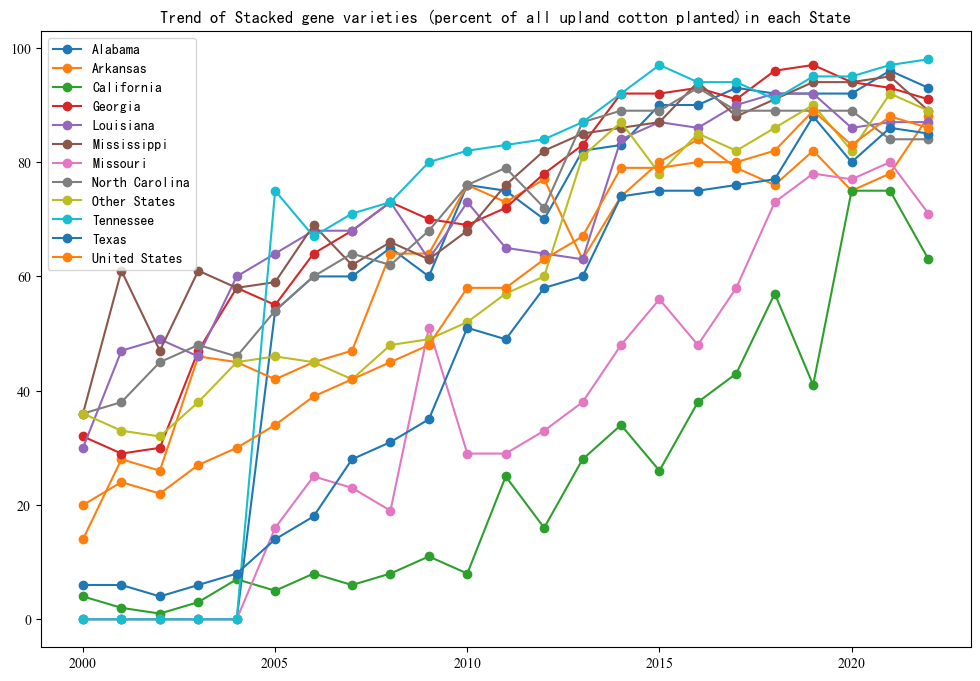

<Figure size 640x480 with 0 Axes>

In [22]:
#Analysis by Attributes
for attribute in sorted(data1.Attribute.unique()):
    data2 = data1[data1["Attribute"] == attribute]
    mean2 = data2.Value.mean()
    dict2[attribute] = mean2

    plt.figure(figsize=(12, 8))
    for state in data2.State.unique():
        year_dict1 = {i: 0 for i in year1}
        data3 = data2[data2["State"] == state]
        for m in range(data3.shape[0]):
            year_dict1[list(data3["Year"])[m]] = list(data3["Value"])[m]
        plt.plot(year1, year_dict1.values(), marker='o', label=state)
    plt.xticks(fontproperties='Times New Roman', fontsize=10)
    plt.yticks(fontproperties='Times New Roman', fontsize=10)
    plt.title(f'Trend of {attribute}in each State')
    plt.legend()
    plt.show()
    plt.savefig(f'Attribute Analysis/{attribute}.jpg')

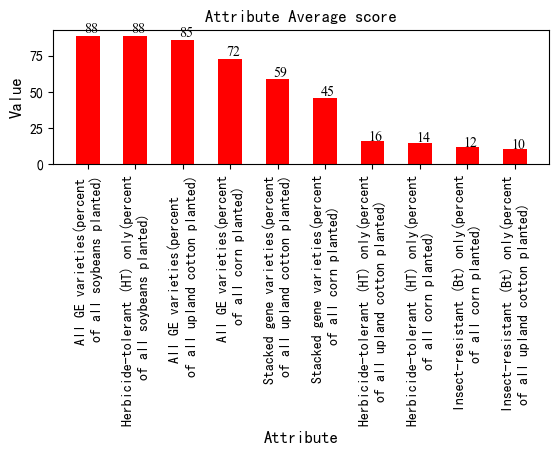

<Figure size 640x480 with 0 Axes>

In [23]:
dict2 = {k.replace(' (percent','(percent\n'): v for k, v in sorted(dict2.items(), key=lambda item: item[1],reverse=True)}
cm2 = plt.bar([i for i in dict2.keys()],[i for i in dict2.values()],width=0.5,color="r")
autolabel(cm2)
plt.xlabel("Attribute", size=12)
plt.ylabel("Value", size=12)
plt.title("Attribute Average score")
plt.xticks(rotation=90, ha='center')
plt.subplots_adjust(bottom=0.6)
plt.show()
plt.savefig(f'Attribute Analysis/Attribute.jpg')
